## 예제
1. test_csv폴더에 있는 '유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109'파일을 로드
2. 각 컬럼의 이름을['기준연월','업종','성별',연령대','총이용건수','총이용금액']
3. 기준년월을 시계열데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자,2는 여자로 변경,9는 무관
5. 남,녀 성별을 기준으로 연도별 전당 이용금액의 평균이 몇인지 출력

In [107]:
import pandas as pd


In [108]:
_group1=pd.read_csv("../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding='euc-kr')
_group1.head(1)

#'euc-kr'은 한글을 읽어주는 encoding

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600.000000


In [109]:
_group1.columns=['기준연월','업종','성별','연령대','총이용건수','총이용금액']

# 판다스에서 지수표현 없애기
pd.options.display.float_format='{:2f}'.format

_group1.head(5)

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000


In [110]:
_time= _group1["기준연월"]
#_time
_group1["기준연월"]=pd.to_datetime(_time, format="%Y%m")

# 인덱스를 기준년월로 설정
_group1.set_index('기준연월', inplace=True)



In [111]:
# 괴상한 데이터 
_group1['연령대'].value_counts()   # 나이 0은 뭘까????

10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: 연령대, dtype: int64

In [112]:
#case 1
def change(x):
    if x ==1:
        result='남자'
    elif x==2:
        result='여자'
    elif x==9:
        result='무관'
    else:
        result='-'
    
    return result

_group1["성별"].apply(change).value_counts


<bound method IndexOpsMixin.value_counts of 기준연월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object>

In [113]:
_group1['성별'].apply(lambda x: "남자" if (x==1)
                    else ("여자" if(x==2) else "무관" ))

기준연월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object

In [114]:
# 여러개로 바꿀때는 replace에 {}형태로 바꾼다!!!!!!!!!!!!!!!!! 뭐를 뭐로 바꾸는지 알아야되기 때문에

_group1["성별"]=_group1["성별"].replace({1:'남자',2:'여자',9:'무관'})
#_group1



In [115]:
# 연도 파생변수 생성

_group1["연도"]=_group1.index.strftime("%Y")
_group1.head()


,업종,성별,연령대,총이용건수,총이용금액,연도
기준연월,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019
2019-01-01,백화점,남자,10,379,19458720.000000,2019
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019


In [116]:
# 건당 이용금액 파생변수 생성
# 총이용금액 / 총이용건수
_group1["건당이용금액"]=_group1["총이용금액"]/_group1["총이용건수"]

In [117]:
_group1.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [122]:
import platform
import matplotlib.pyplot as plt

In [123]:
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

<Axes: xlabel='연도,성별'>

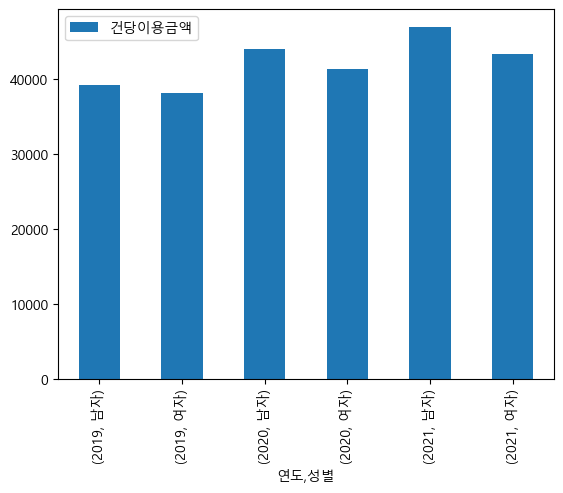

In [124]:
(_group1[['연도','성별','건당이용금액']].groupby(['연도','성별']).mean()).plot.bar()

In [126]:
pivot=pd.pivot_table(
    _group1,
    index= '연도',
    columns= '성별',
    aggfunc = 'mean',
    values='건당이용금액'
)

<Axes: xlabel='연도'>

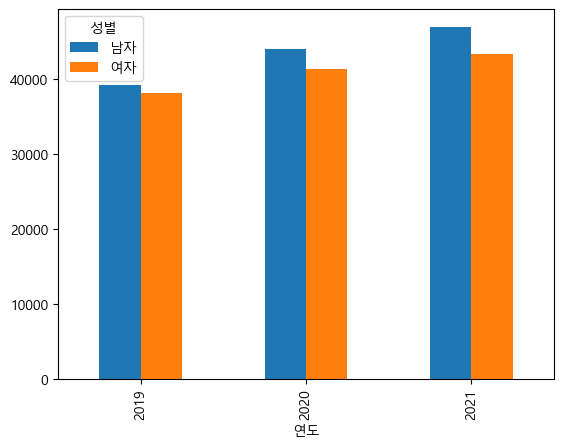

In [127]:
pivot.plot.bar()